Agnieszka Dutka
# Algorytmy Tekstowe 
 ###### *Laboratorium 1*

### 1 - implementacja algorytmów szukających wzorca w tekście

In [1]:

# ------------------- naive algorithm ------------------------

def naive_string_matching(text, pattern):
    res = 0
    for s in range(0, len(text) - len(pattern) + 1):
        if(pattern == text[s:s+len(pattern)]):
            res += 1
    return res
            
            
# ------------------- finite automat  ------------------------          

import re

def transition_table(pattern, alphabet):
    result = []
    for q in range(len(pattern)+1):
        result.append({})

        for letter in alphabet:
            k = min(len(pattern), q + 1)

            while k > 0 and pattern[:k] != (pattern[:q] + letter)[q - k + 1:]:
                k -= 1
            result[q][letter] = k

    return result

def fa_string_matching(text, delta):
    res = 0
    q = 0
    for s in range(0, len(text)):
        if( text[s] not in delta[q].keys()):
            q = 0
        else:
            q = delta[q][text[s]]
            if(q == len(delta) - 1):
                res += 1
    return res
            
#------------ Knuth-Morris-Pratt algorithm --------------------

def prefix_function(pattern):
    pi = [0]
    k = 0
    for q in range(1, len(pattern)):
        while(k > 0 and pattern[k] != pattern[q]):
            k = pi[k-1]
        if(pattern[k] == pattern[q]):
            k = k + 1
        pi.append(k)
    return pi

def kmp_string_matching(text, pattern, pi):
    res = 0
    q = 0
    for i in range(0, len(text)):
        while(q > 0 and pattern[q] != text[i]):
            q = pi[q-1]
        if(pattern[q] == text[i]):
            q = q + 1
        if(q == len(pattern)):
            res += 1
            q = pi[q-1]
    return res
            

### 2 - Funkcje testujące

In [2]:
from time import perf_counter

def eval_func(func, args, count=4):
    start = perf_counter()
    for i in range(0, count):
        func(*args)
    end = perf_counter()
    average = (end-start)/count
    return average


In [3]:
# summary comparing 3 algorithms for given pattern and text

def summary(text, pattern, count=4):
    if(len(pattern)>100):
        print("summary for pattern ", pattern[:100], "...")
    else:
        print("summary for pattern ", pattern)
    res1 = naive_string_matching(text, pattern)
    pi = prefix_function(pattern)
    res2 = kmp_string_matching(text, pattern, pi)
    tr_table = transition_table(pattern, set(pattern))
    res3 = fa_string_matching(text, tr_table)
    print(res1, " ",res2, " ", res3)
    print("naive alg average time: ",eval_func(naive_string_matching, [text, pattern], count))
    print("kmp alg average time: ",eval_func(kmp_string_matching, [text, pattern, pi], count))
    print("finite automat average time: ",eval_func(fa_string_matching, [text, tr_table], count))


### 2 - przeprowadzone testy

In [112]:
# 2 - running some tests
f = open("ustawa.txt", "r", encoding='utf-8')
text = ''.join(f.readlines())
summary(text, "przy")
summary(text, "podatników")
summary(text, "przyc")
summary(text, "a")

summary for pattern  przy
first...
262   262   262
naive alg average time:  0.05332889999999679
kmp alg average time:  0.04572714999994787
finite automat average time:  0.04352625000001353
summary for pattern  podatników
first...
29   29   29
naive alg average time:  0.061231525000039255
kmp alg average time:  0.05567184999995334
finite automat average time:  0.04843137500006378
summary for pattern  przyc
first...
141   141   141
naive alg average time:  0.05538417499997195
kmp alg average time:  0.05921115000001009
finite automat average time:  0.05259129999990364
summary for pattern  a
first...
10346   10346   10346
naive alg average time:  0.04512682499989751
kmp alg average time:  0.05159694999997555
finite automat average time:  0.04621945000008054


Screen wyników
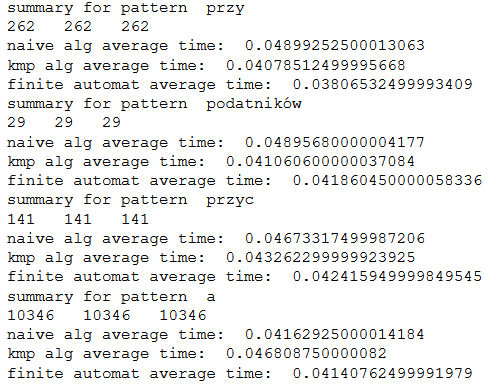

### 3, 4 - szukanie wzorca "art" w Ustawie

In [98]:
summary(text, "art")  


summary for pattern  art
273   273   273
naive alg average time:  0.05074350000006689
kmp alg average time:  0.04957439999998314
finite automat average time:  0.03802832499991382


Screen wyników
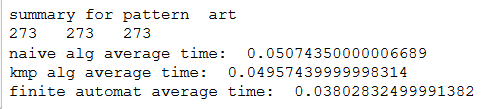

### 5 - Wyszukanie słowa "kruszwil" we fragmencie polskiej Wikipedii

In [108]:
f = open("wikipedia-tail-kruszwil.txt", "r", encoding='utf-8')
text = ''.join(f.readlines())
summary(text, "kruszwil", count=1)

summary for pattern  kruszwil
first...
13   13   13
naive alg average time:  71.3399586000005
kmp alg average time:  69.42106669999976
finite automat average time:  70.43007540000053


Screen wyników
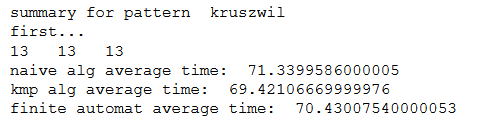

### 6 - algorytm naiwny 2x wolniejszy


In [4]:
f = open("ustawa.txt", "r", encoding='utf-8')
summary(text, "przyc"*300) 

FileNotFoundError: [Errno 2] No such file or directory: 'ustawa.txt'

Screen wyników
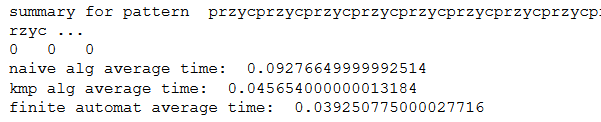


###  7 - wzorzec, dla którego czas obliczenia tablicy przejścia automatu skończonego jest co najmniej dwukrotnie dłuższy, niż czas potrzebny na utworzenie funkcji przejścia w algorytmie KMP

In [119]:
pat = "przyc"*100
print("time of creating transition table")
print(eval_func( transition_table, [pat, set(pat)]))
print("time of creating prefix function")
print(eval_func(prefix_function, [pat]))


time of creating transition table
0.20876482500011662
time of creating prefix function
0.00011392499982321169


Screen wyników
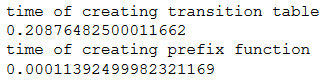
